In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.optimize

In [183]:
N = 30; n = np.arange(1, int(N/2)+1)
z_vec = np.linspace(0, 1, N)
epsilon =0.1
D = 0.6
Q = -0.5
alpha = 0.95
V = 0
mass = 1

In [184]:
def f_no_fixed_mass(vec):
    #print(vec)
    
    M = len(vec)
    
    a = vec[:int(M/2)]; b = vec[int(M/2):]
    
    n = np.arange(int(M/2))
    def eta(z):
        
        return a.T@np.cos(2*n*np.pi*z) + b.T@np.sin(2*n*np.pi*z)
    def eta_z(z):
        return -a.T@(np.sin(2*n*np.pi*z)*2*n*np.pi) + b.T@(np.cos(2*n*np.pi*z)*2*n*np.pi)
    def eta_zzz(z):
        return a.T@(np.sin(2*n*np.pi*z)*(2*n*np.pi)**3) + -b.T@(np.cos(2*n*np.pi*z)*(2*n*np.pi)**3)
    
    equations = np.zeros_like(z_vec)
    for j, z in enumerate(z_vec):
        #print(j, 1/3*eta(z)**3*(1+D*eta_z(z)+epsilon**2*eta_zzz(z))+V*alpha/2*(1+eta(z)/alpha)**2-Q)
        equations[j] = 1/3*eta(z)**3*(1 + D*eta_z(z)+epsilon**2*eta_zzz(z)) + V*alpha/2*(1+eta(z)/alpha)**2-Q
    
    return equations

In [185]:
def f_fixed_mass(vec):
    #print(vec)
    
    M = len(vec)
    
    a = vec[:int(M/2)]; b = vec[int(M/2):]
    
    n = np.arange(1, int(M/2)+1)
    def eta(z):
        
        return a.T@np.cos(2*n*np.pi*z) + b.T@np.sin(2*n*np.pi*z)+mass
    def eta_z(z):
        return -a.T@(np.sin(2*n*np.pi*z)*2*n*np.pi) + b.T@(np.cos(2*n*np.pi*z)*2*n*np.pi)
    def eta_zzz(z):
        return a.T@(np.sin(2*n*np.pi*z)*(2*n*np.pi)**3) + -b.T@(np.cos(2*n*np.pi*z)*(2*n*np.pi)**3)
    
    equations = np.zeros_like(vec)
    for j, z in enumerate(z_vec):
        #print(j, 1/3*eta(z)**3*(1+D*eta_z(z)+epsilon**2*eta_zzz(z))+V*alpha/2*(1+eta(z)/alpha)**2-Q)
        equations[j] = 1/3*eta(z)**3*(1 + D*eta_z(z)+epsilon**2*eta_zzz(z)) + V*alpha/2*(1+eta(z)/alpha)**2-Q
    
    return equations

In [186]:
vec_sol = scipy.optimize.fsolve(f_fixed_mass,  np.ones(N))
a_sol = vec_sol[:int(N/2)].reshape(int(N/2),-1); b_sol = vec_sol[int(N/2):].reshape(int(N/2),-1)


/Users/javier/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


1.0


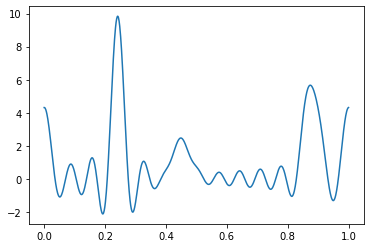

In [182]:
refined_z = np.linspace(0,1,1000)
eta_sol = np.zeros_like(refined_z)+mass
for j,n_value in enumerate(n):
    eta_sol += a_sol[j]*np.cos(n_value*2*np.pi*refined_z)+b_sol[j]*np.sin(n_value*2*np.pi*refined_z)
plt.plot(refined_z, eta_sol)
print(np.trapz(eta_sol, refined_z))

In [118]:
vec = np.arange(6)
M = len(vec)
a = vec[:int(M/2)]; b = vec[int(M/2):]
n = np.arange(int(M/2))
np.ones(3).T@np.cos(2*n*np.pi*1) 

3.0

## Travelling waves

In [281]:
b_guess = np.array([ 0.8365995 ,  0.48875849,  0.22808724,  0.08264847, -0.09378223,
       -0.32936483, -0.49686417, -0.53005855, -0.49627895, -0.44590333,
       -0.34207829, -0.17173213, -0.00280133,  0.11204528,  0.19366841,
        0.26138669,  0.2837362 ,  0.24313301,  0.17845483,  0.12486516,
        0.07041221,  0.00496502, -0.04355845, -0.05519087, -0.05183223,
       -0.05459673, -0.05039934, -0.02855737, -0.00966242, -0.01024667])
a_guess = np.array([-2.30823565e-01, -4.28480945e-01, -5.65248247e-01, -6.23295861e-01,
       -5.97340964e-01, -4.95060100e-01, -3.35285442e-01, -1.44409001e-01,
        4.83107220e-02,  2.15673988e-01,  3.36782737e-01,  3.99851182e-01,
        4.03195786e-01,  3.54412770e-01,  2.68057876e-01,  1.62371161e-01,
        5.57484981e-02, -3.63343754e-02, -1.03432469e-01, -1.41045415e-01,
       -1.50343229e-01, -1.36905186e-01, -1.08850213e-01, -7.48374773e-02,
       -4.23628535e-02, -1.66181156e-02, -2.52618445e-05,  7.56931732e-03,
        8.19402091e-03,  4.81056932e-03])
vec_guess = np.concatenate([a_guess, b_guess, np.array([0.5, 1])])
vec_guess

array([-2.30823565e-01, -4.28480945e-01, -5.65248247e-01, -6.23295861e-01,
       -5.97340964e-01, -4.95060100e-01, -3.35285442e-01, -1.44409001e-01,
        4.83107220e-02,  2.15673988e-01,  3.36782737e-01,  3.99851182e-01,
        4.03195786e-01,  3.54412770e-01,  2.68057876e-01,  1.62371161e-01,
        5.57484981e-02, -3.63343754e-02, -1.03432469e-01, -1.41045415e-01,
       -1.50343229e-01, -1.36905186e-01, -1.08850213e-01, -7.48374773e-02,
       -4.23628535e-02, -1.66181156e-02, -2.52618445e-05,  7.56931732e-03,
        8.19402091e-03,  4.81056932e-03,  8.36599500e-01,  4.88758490e-01,
        2.28087240e-01,  8.26484700e-02, -9.37822300e-02, -3.29364830e-01,
       -4.96864170e-01, -5.30058550e-01, -4.96278950e-01, -4.45903330e-01,
       -3.42078290e-01, -1.71732130e-01, -2.80133000e-03,  1.12045280e-01,
        1.93668410e-01,  2.61386690e-01,  2.83736200e-01,  2.43133010e-01,
        1.78454830e-01,  1.24865160e-01,  7.04122100e-02,  4.96502000e-03,
       -4.35584500e-02, -

In [297]:
N = len(a_guess); n = np.arange(1,N+1); L = 2*np.pi
M = 2*N + 2

collocation_points = np.linspace(-L/2, L/2, M-1)

epsilon = 0.1; D = 0.6; alpha = 0.95; 
print(n)
def f_solitary_wave(vec):
    M = len(vec); N = int((M-2)/2)
    a = vec[:N]; b = vec[N:(M-2)]; A = vec[M-2]; c = vec[-1]

    eta = np.zeros_like(collocation_points); eta_z = np.zeros_like(collocation_points)
    eta_zz = np.zeros_like(collocation_points); eta_zzz = np.zeros_like(collocation_points)
    eta_zzzz = np.zeros_like(collocation_points)
    
    for j,n_value in enumerate(n):
        eta += a[j]*np.cos(n_value*np.pi/L*collocation_points) + b[j]*np.sin(n_value*np.pi/L*collocation_points) + A
        #eta_z
        eta_z += -a[j]*np.sin(n_value*np.pi/L*collocation_points)*n_value*np.pi/L
        eta_z += b[j]*np.cos(n_value*np.pi/L*collocation_points)*n_value*np.pi/L
        #eta_zz
        eta_zz += -a[j]*np.cos(n_value*np.pi/L*collocation_points)*(n_value*np.pi/L)**2
        eta_zz += -b[j]*np.sin(n_value*np.pi/L*collocation_points)*(n_value*np.pi/L)**2
        #eta-zzz
        eta_zzz += a[j]*np.sin(n_value*np.pi/L*collocation_points)*(n_value*np.pi/L)**3
        eta_zzz += -b[j]*np.cos(n_value*np.pi/L*collocation_points)*(n_value*np.pi/L)**3
        #eta_zzzz
        eta_zzzz += a[j]*np.cos(n_value*np.pi/L*collocation_points)*(n_value*np.pi/L)**4
        eta_zzzz += b[j]*np.sin(n_value*np.pi/L*collocation_points)*(n_value*np.pi/L)**4
        
    equations = np.zeros_like(vec)
    equations[:-1] = -c*eta_z + eta**2*eta_z + D*(eta**3/3*eta_zz + eta**2*eta_z**2) + epsilon**2*(eta**3/3*eta_zzzz + eta**2*eta_z*eta_zzz)
    equations[-1] = np.trapz(eta, collocation_points) - L
    
    return equations

vec_sol = scipy.optimize.fsolve(f_solitary_wave,  vec_guess)
a_sol = vec_sol[:N]; b_sol =  vec_sol[N:(M-2)]; A = vec_sol[M-2]; c = vec_sol[-1]



[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


/Users/javier/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


-27908.096883782666


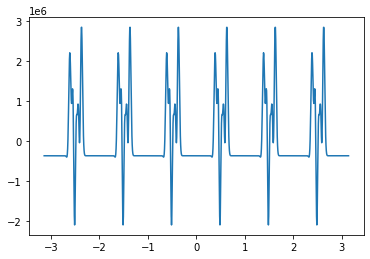

In [298]:
refined_z = np.linspace(-L/2, L/2,1000)
eta_sol = np.zeros_like(refined_z) + A
for j,n_value in enumerate(n):
    eta_sol += a_sol[j]*np.cos(n_value*2*np.pi*refined_z) + b_sol[j]*np.sin(n_value*2*np.pi*refined_z)
plt.plot(refined_z, eta_sol)
print(np.trapz(eta_sol, refined_z))

In [285]:
A

12615.893169487721

In [286]:
c

610.1208124603194

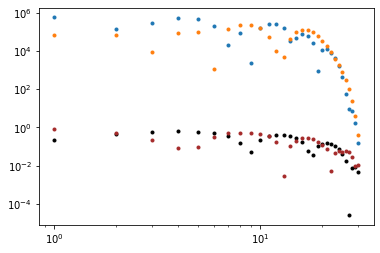

In [292]:
plt.loglog(n, abs(a_sol), '.')
plt.loglog(n, abs(a_guess), '.', color='black')
plt.loglog(n, abs(b_sol), '.')
plt.loglog(n, abs(b_guess), '.', color='brown')

# Code with boundary condition
$$\eta_z(0)=0$$

In [ ]:
N = len(a_guess); n = np.arange(1,N+1); L = 2*np.pi
M = 2*N + 2

collocation_points = np.linspace(-L/2, L/2, M-2)

epsilon = 0.1; D = 0.6; alpha = 0.95; 
print(n)
def f_solitary_wave(vec):
    M = len(vec); N = int((M-2)/2)
    a = vec[:N]; b = vec[N:(M-2)]; A = vec[M-2]; c = vec[-1]

    eta = np.zeros_like(collocation_points); eta_z = np.zeros_like(collocation_points)
    eta_zz = np.zeros_like(collocation_points); eta_zzz = np.zeros_like(collocation_points)
    eta_zzzz = np.zeros_like(collocation_points)
    
    for j,n_value in enumerate(n):
        eta += a[j]*np.cos(n_value*np.pi/L*collocation_points) + b[j]*np.sin(n_value*np.pi/L*collocation_points) + A
        #eta_z
        eta_z += -a[j]*np.sin(n_value*np.pi/L*collocation_points)*n_value*np.pi/L
        eta_z += b[j]*np.cos(n_value*np.pi/L*collocation_points)*n_value*np.pi/L
        #eta_zz
        eta_zz += -a[j]*np.cos(n_value*np.pi/L*collocation_points)*(n_value*np.pi/L)**2
        eta_zz += -b[j]*np.sin(n_value*np.pi/L*collocation_points)*(n_value*np.pi/L)**2
        #eta-zzz
        eta_zzz += a[j]*np.sin(n_value*np.pi/L*collocation_points)*(n_value*np.pi/L)**3
        eta_zzz += -b[j]*np.cos(n_value*np.pi/L*collocation_points)*(n_value*np.pi/L)**3
        #eta_zzzz
        eta_zzzz += a[j]*np.cos(n_value*np.pi/L*collocation_points)*(n_value*np.pi/L)**4
        eta_zzzz += b[j]*np.sin(n_value*np.pi/L*collocation_points)*(n_value*np.pi/L)**4
        
    equations = np.zeros_like(vec)
    equations[0] = np.sum([-a[j]*(n[j]*np.pi/L)**2 for j in range(len(n))])
    equations[1:-1] = -c*eta_z + eta**2*eta_z + D*(eta**3/3*eta_zz + eta**2*eta_z**2) + epsilon**2*(eta**3/3*eta_zzzz + eta**2*eta_z*eta_zzz)
    equations[-1] = np.trapz(eta, collocation_points) - L
    
    return equations

vec_sol = scipy.optimize.fsolve(f_solitary_wave,  vec_guess)
a_sol = vec_sol[:N]; b_sol =  vec_sol[N:(M-2)]; A = vec_sol[M-2]; c = vec_sol[-1]

